# Cargar librerías [MNE](https://mne.tools/dev/index.html) y [IDTxl](https://github.com/pwollstadt/IDTxl/wiki)


In [6]:
%matplotlib notebook
import mne
import matplotlib.pyplot as plt
import numpy as np
from idtxl.multivariate_te import MultivariateTE
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
from idtxl.active_information_storage import ActiveInformationStorage

# Cargar datos

In [2]:
dataS = mne.io.read_raw_edf('s01.edf')
dataH = mne.io.read_raw_edf('h01.edf')

Extracting EDF parameters from D:\_WINDOWS\Documents\UCHILE\EEG\Clase\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\_WINDOWS\Documents\UCHILE\EEG\Clase\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
print(dataS.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2004-08-20 12:19:24 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>


In [4]:
print('Idx | Name Channel')
print('----|-------------')
for i,j in enumerate(dataS.ch_names):
    print('%3d | %s'%(i,j))

Idx | Name Channel
----|-------------
  0 | Fp2
  1 | F8
  2 | T4
  3 | T6
  4 | O2
  5 | Fp1
  6 | F7
  7 | T3
  8 | T5
  9 | O1
 10 | F4
 11 | C4
 12 | P4
 13 | F3
 14 | C3
 15 | P3
 16 | Fz
 17 | Cz
 18 | Pz


Setting up band-stop filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 8.00, 12.50 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


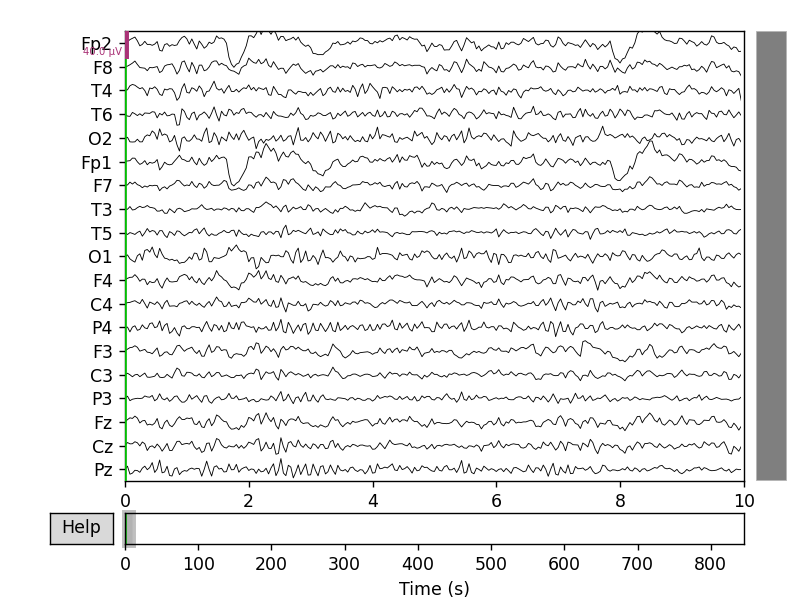

<IPython.core.display.Javascript object>


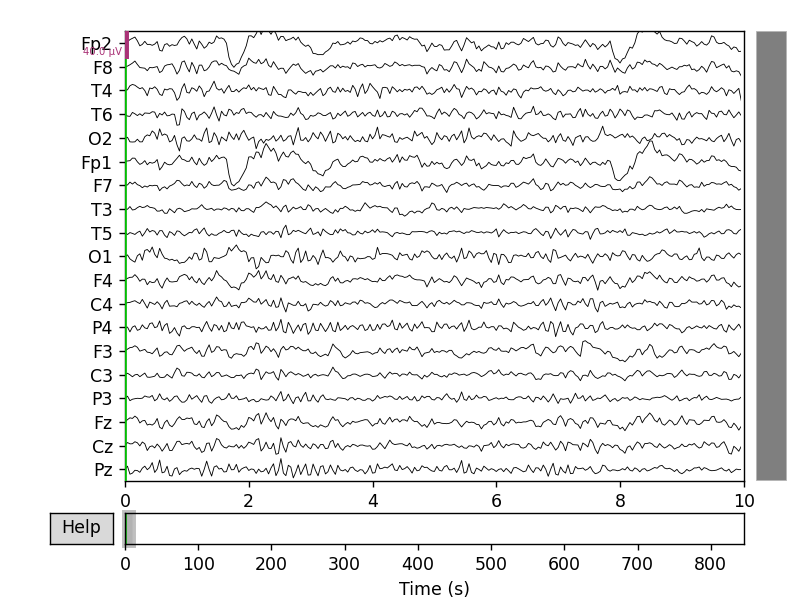

In [7]:
dataS.plot(duration=10,lowpass=8,highpass=12.5,filtorder=2,title="Schizophrenic EEG (Alpha band)")

Setting up band-stop filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 8.00, 12.50 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


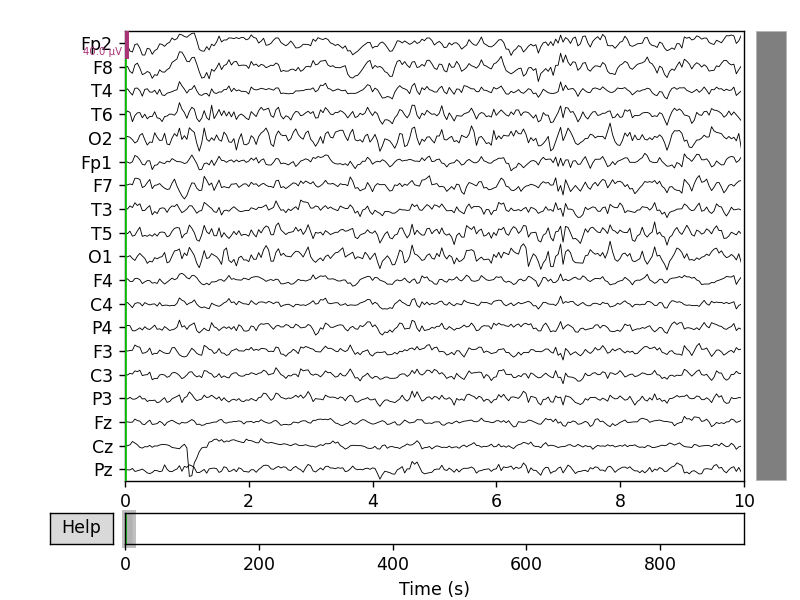

<IPython.core.display.Javascript object>


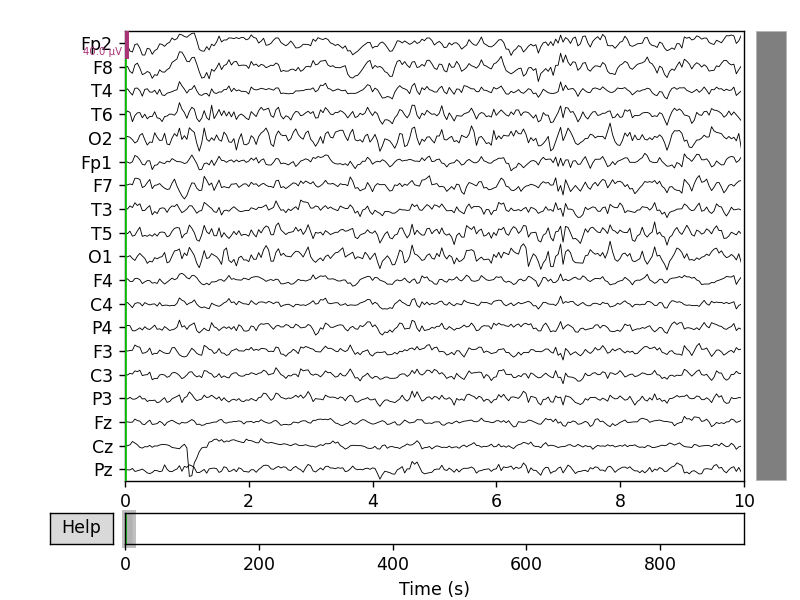

In [8]:
dataH.plot(duration=10,lowpass=8,highpass=12.5,filtorder=2,title="Healthy EEG (Alpha band)")

## Generar filtros

In [9]:
def filter_eeg(dataXX,type_filter='alpha'):
    if type_filter.lower() == 'alpha':
        l_freq = 8
        h_freq = 12.5
    elif type_filter.lower() == 'beta':
        l_freq = 13
        h_freq = 30
    elif type_filter.lower() == 'gamma':
        l_freq = 30
        h_freq = 45
    elif type_filter.lower() == 'delta':
        l_freq = 2
        h_freq = 4
    elif type_filter.lower() == 'theta':
        l_freq = 4.5
        h_freq = 7.5
    return mne.filter.filter_data(dataXX.get_data(), dataXX.info['sfreq'],l_freq=l_freq, h_freq=h_freq,method='iir',
                           iir_params=dict(order=2, ftype='butter'))

Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 8.00, 12.50 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


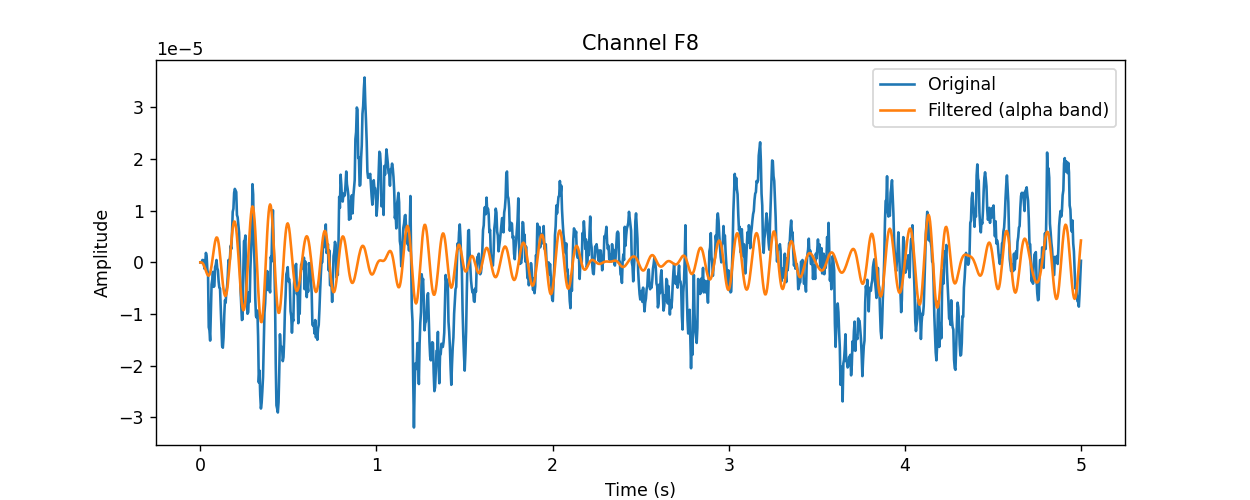

Text(0.5, 1.0, 'Channel F8')

In [12]:
datax = dataH
t = 5 #seconds
filter_type = 'alpha'
nch = 1

n = int(datax.info['sfreq']*t)
tt = np.linspace(0,t,n)
A = filter_eeg(datax, filter_type)
plt.figure(figsize=(10,4))
plt.plot(tt, datax.get_data()[nch,:n],label='Original')
plt.plot(tt, A[nch,:n],label='Filtered (%s band)'%(filter_type))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Channel %s'%(datax.ch_names[nch]))

# Active Information Storage (AIS)

In [22]:
dataAIS = Data(data=A[nch,:n].reshape(1,-1), dim_order='ps') 
network_analysis = ActiveInformationStorage()
settings = {'cmi_estimator':  'JidtKraskovCMI',
           'max_lag': 5,
           'local_values':True,
           'n_perm_max_stat': 11,
           'n_perm_min_stat': 11,
           'alpha_max_stat': 0.1,
           'n_perm_omnibus': 11,
           'alpha_omnibus': 0.1,
           'n_perm_max_seq': 11,
           'alpha_max_seq': 0.1, 
           'alpha_min_stat': 0.1}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=dataAIS)

Adding data with properties: 1 processes, 1250 samples, 1 replications
overwriting existing data

####### analysing process 0 of [0]

---------------------------- (1) include candidates
testing candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate (0, 1) 
maximum statistic, n_perm: 11
testing candidate (0, 3) maximum statistic, n_perm: 11
testing candidate (0, 5) maximum statistic, n_perm: 11
testing candidate (0, 4) maximum statistic, n_perm: 11
testing candidate (0, 2) maximum statistic, n_perm: 11

---------------------------- (2) prune source candidates
testing candidate set: [(0, 1), (0, 3), (0, 5), (0, 4), (0, 2)]testing candidate: (0, 2)
minimum statistic, n_perm: 11
 -- significant

---------------------------- (3) final statistics
selected sources: [(0, 1), (0, 3), (0, 5), (0, 4), (0, 2)]
mi permutation test against surrogates, n_perm: 500
final conditional samples: [(0, 1), (0, 3), (0, 5), (0, 4), (0, 2)]


<IPython.core.display.Javascript object>


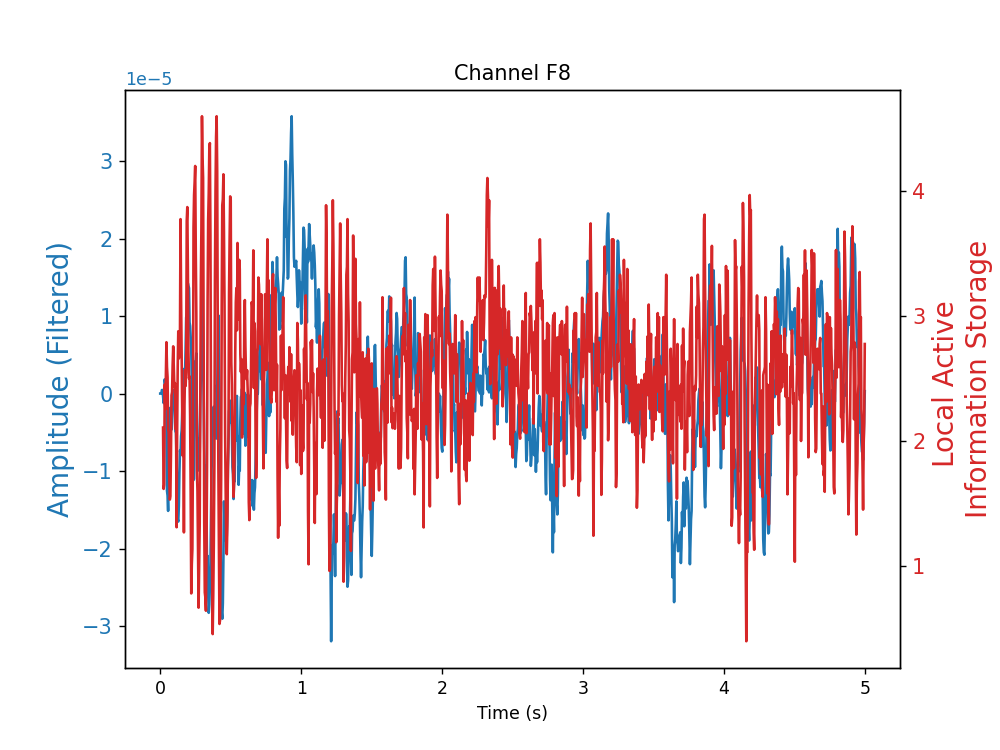

Text(0.5, 1.0, 'Channel F8')

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
color = 'tab:blue'
ax12 = ax.twinx()
ax.plot(tt, datax.get_data()[nch,:n], label='Original',color=color)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (Filtered)', color=color, fontsize=16)
ax.tick_params(axis='y', labelcolor=color, labelsize=12)
color = 'tab:red'
ax12.plot(tt[results.settings['max_lag']:],results.get_single_process(0)['ais'][0], color=color)
ax12.set_ylabel('Local Active \nInformation Storage', color=color, fontsize=16)
ax12.tick_params(axis='y', labelcolor=color, labelsize=12)
ax.set_title('Channel %s'%(datax.ch_names[nch]))

# Transfer Entropy

In [32]:
A[:5,:n].reshape(5,n).shape

(5, 1250)

In [33]:
nchs = 5
dataTE = Data(data=A[:nchs,:n].reshape(nchs,n), dim_order='ps') 
# b) Initialise analysis object and define settings
network_analysisTE = MultivariateTE()
settingsTE = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 3,
            'min_lag_sources': 1,       
            'n_perm_max_stat': 11,
           'n_perm_min_stat': 11,
           'alpha_max_stat': 0.1,
           'n_perm_omnibus': 11,
         'alpha_omnibus': 0.1,
         'n_perm_max_seq': 11,
         'alpha_max_seq': 0.1, 
           'alpha_min_stat': 0.1}
# 'cmi_estimator':  'JidtKraskovCMI',

# c) Run analysis
resultsTE = network_analysisTE.analyse_network(settings=settingsTE, data=dataTE)#, targets=[0], sources=[2,3])


Adding data with properties: 5 processes, 1250 samples, 1 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4]

Target: 0 - testing sources [1, 2, 3, 4]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 11
testing candidate: (0, 2) maximum statistic, n_perm: 11
testing candidate: (0, 3) maximum statistic, n_perm: 11

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3), (4, 1), (4, 2), (4, 3)]
testing candidate: (3, 1) maximum statistic, n_perm: 11
testing candidate: (2, 2) maximum statistic, n_perm: 11
testing candidate: (1, 1) maximum statistic, n_perm: 11
testing candidate: (4, 2) maximum statistic, n_perm: 11
testing candidate: (2, 3) maximum statistic, n_perm: 11
testing candidate: (1, 2) maximum statistic, n_perm: 11
testing candidate: 

testing candidate: (3, 3) maximum statistic, n_perm: 11
testing candidate: (3, 1) maximum statistic, n_perm: 11
testing candidate: (3, 2) maximum statistic, n_perm: 11
testing candidate: (1, 1) maximum statistic, n_perm: 11
testing candidate: (1, 3) maximum statistic, n_perm: 11
testing candidate: (0, 2) maximum statistic, n_perm: 11
testing candidate: (2, 1) maximum statistic, n_perm: 11
testing candidate: (2, 3) maximum statistic, n_perm: 11
testing candidate: (2, 2) maximum statistic, n_perm: 11
testing candidate: (0, 3) maximum statistic, n_perm: 11
 -- not significant

---------------------------- (3) prune source candidate
selected candidates: [(1, 2), (3, 3), (3, 1), (3, 2), (1, 1), (1, 3), (0, 2), (2, 1), (2, 3), (2, 2)]
testing candidate: (0, 2) minimum statistic, n_perm: 11
 -- significant

---------------------------- (4) final statistics
selected variables: [(4, 1), (4, 2), (4, 3), (1, 2), (3, 3), (3, 1), (3, 2), (1, 1), (1, 3), (0, 2), (2, 1), (2, 3), (2, 2)]
omnibus test,

AttributeError: 'ResultsSingleProcessAnalysis' object has no attribute 'print_edge_list'

	0 -> 1, max_te_lag: 1
	0 -> 2, max_te_lag: 1
	0 -> 4, max_te_lag: 2
	1 -> 0, max_te_lag: 3
	1 -> 2, max_te_lag: 3
	1 -> 3, max_te_lag: 3
	1 -> 4, max_te_lag: 1
	2 -> 0, max_te_lag: 3
	2 -> 1, max_te_lag: 1
	2 -> 3, max_te_lag: 3
	2 -> 4, max_te_lag: 3
	3 -> 0, max_te_lag: 3
	3 -> 1, max_te_lag: 3
	3 -> 2, max_te_lag: 1
	3 -> 4, max_te_lag: 1
	4 -> 0, max_te_lag: 3
	4 -> 2, max_te_lag: 1
	4 -> 3, max_te_lag: 1


<IPython.core.display.Javascript object>


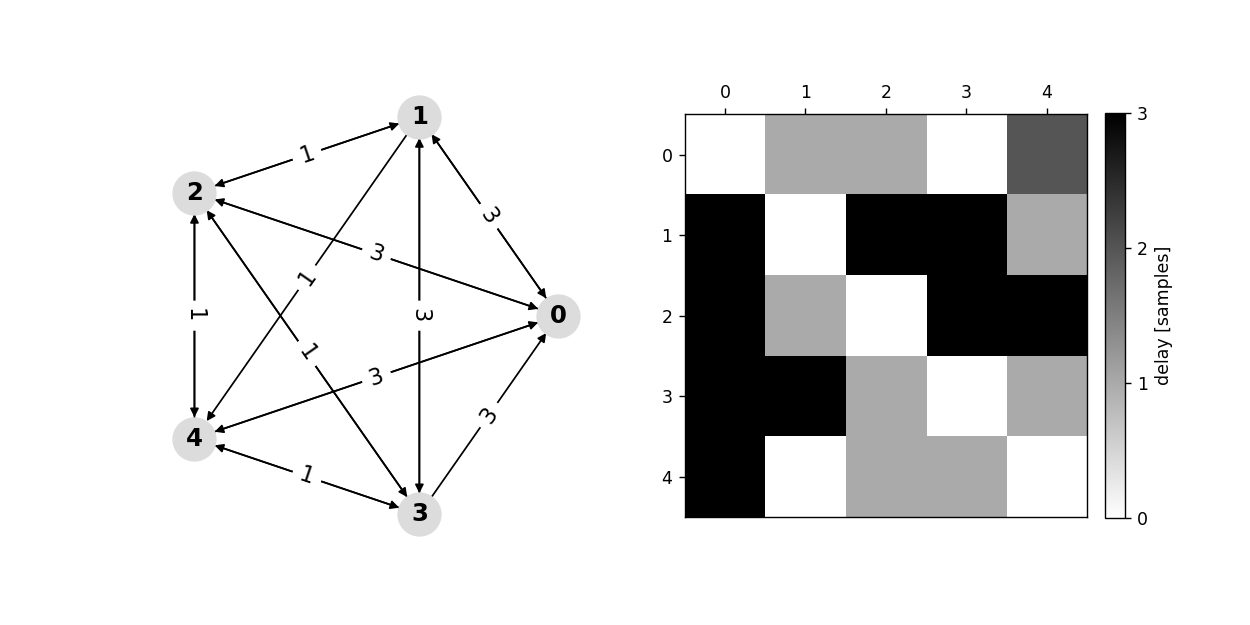

C:\Users\x-30679\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\x-30679\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


In [34]:
# d) Plot inferred network to console and via matplotlib
resultsTE.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=resultsTE, weights='max_te_lag', fdr=False)
plt.show()